# EV Car Prices

This assignment focuses on car prices. The data ('car_prices.xlsx') is a pre-processed version of original data scraped from bilbasen.dk by previous MAL1 students. The dataset contains 16 columns:

- **Price (DKK)**: The current listed price of the vehicle in Danish Kroner.
- **Model Year**: The manufacturing year of the vehicle.
- **Mileage (km)**: The total kilometres driven by the vehicle (odometer reading).
- **Electric Range (km)**: The estimated maximum driving range on a full charge.
- **Battery Capacity (kWh)**: The total capacity of the vehicle's battery in kilowatt-hours.
- **Energy Consumption (Wh/km)**: The vehicle's energy consumption in watt-hours per kilometre.
- **Annual Road Tax (DKK)**: The annual road tax cost in Danish Kroner.
- **Horsepower (bhp)**: The vehicle's horsepower (brake horsepower).
- **0-100 km/h (s)**: The time (in seconds) for the car to accelerate from 0 to 100 km/h.
- **Top Speed (km/h)**: The maximum speed the vehicle can achieve.
- **Towing Capacity (kg)**: The maximum weight the vehicle can tow.
- **Original Price (DKK)**: The price of the vehicle when first sold as new.
- **Number of Doors**: The total number of doors on the vehicle.
- **Rear-Wheel Drive**: A binary indicator (1 = Yes, 0 = No) for rear-wheel drive.
- **All-Wheel Drive (AWD)**: A binary indicator (1 = Yes, 0 = No) for all-wheel drive.
- **Front-Wheel Drive**: A binary indicator (1 = Yes, 0 = No) for front-wheel drive.

The first one, **Price**, is the response variable.

The **objective** of this assignment is:
1. Understand how linear algebra is used in Machine Learning, specifically for correlations and regression
2. Learn how to perform multiple linear regression, lasso regression, lasso regression and elastic net
3. Learn how to assess regression models

Please solve the tasks using this notebook as you template, i.e. insert code blocks and markdown blocks to this notebook and hand it in. Please use 42 as your random seed.


## Import data
 - Import the dataset 
 - Split the data in a training set and test set - make sure you extract the response variable
 - Remember to use the data appropriately; in the tasks below, we do not explicitly state when to use train and test - but in order to compare the models, you must use the same dataset for training and testing in all models.
 - Output: When you are done with this, you should have the following sets: `X` (the original dataset), `X_train`, `X_train`, `X_test`, `y_train`, `y_test`

In [1]:
# Code block for important and creating data sets. Add more code blocks if needed.
import pandas as pd
import sklearn as sk
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# load the data
data = pd.read_excel("car_prices.xlsx")
display(data)

features = [
    "Model Year",
    "Mileage (km)",
    "Electric Range (km)",
    "Battery Capacity (kWh)",
    "Energy Consumption (Wh/km)",
    "Annual Road Tax (DKK)",
    "Horsepower (bhp)",
    "0-100 km/h (s)",
    "Top Speed (km/h)",
    "Towing Capacity (kg)",
    "Original Price (DKK)",
    "Number of Doors",
    "Rear-Wheel Drive",
    "Front-Wheel Drive",
]

X = data[features]  # features

y = data["Price (DKK)"]  # target


scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X

,Price (DKK),Model Year,Mileage (km),Electric Range (km),Battery Capacity (kWh),Energy Consumption (Wh/km),Annual Road Tax (DKK),Horsepower (bhp),0-100 km/h (s),Top Speed (km/h),Towing Capacity (kg),Original Price (DKK),Number of Doors,Rear-Wheel Drive,Front-Wheel Drive
0,199900,2024,3000,270,39.0,168,780,147,7.9,144,1000,250720,5,0,1
1,455555,2024,1001,536,82.0,177,780,408,4.9,180,1800,462900,5,0,0
2,309900,2024,4000,460,64.8,162,780,204,7.8,167,750,345620,5,0,1
3,425362,2024,10,550,76.6,153,780,286,6.7,180,1000,395615,5,1,0
4,749900,2024,0,505,99.8,228,780,384,5.3,200,2500,745520,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6221,414000,2023,12000,514,70.0,173,780,534,3.7,250,1600,452216,5,0,0
6222,289000,2021,90000,469,78.0,193,780,408,4.7,210,1500,395420,5,0,0
6223,385000,2023,11000,450,66.0,170,780,286,6.0,190,1600,475675,5,1,0
6224,109900,2017,90000,280,28.0,115,780,120,9.9,165,1000,279994,5,0,1


array([[ 1.31342879, -0.78448877, -1.68123293, ...,  0.3499183 ,
        -0.78344721,  1.28383597],
       [ 1.31342879, -0.86479102,  1.02344197, ...,  0.3499183 ,
        -0.78344721, -0.77891571],
       [ 1.31342879, -0.74431756,  0.25067771, ...,  0.3499183 ,
        -0.78344721,  1.28383597],
       ...,
       [ 0.60049002, -0.46311908,  0.1489982 , ...,  0.3499183 ,
         1.27641019, -0.77891571],
       [-3.67714258,  2.71040659, -1.57955343, ...,  0.3499183 ,
        -0.78344721,  1.28383597],
       [-0.82538751,  0.86253088, -1.68123293, ..., -3.1724606 ,
        -0.78344721,  1.28383597]], shape=(6226, 14))

## Part 1: Linear Algebra
In this assignment, you have to solve all problems using linear algebra concepts. You are free to use SymPy or NumPy - though NumPy is **significantly** more efficient computationally than SymPy since NumPy is optimized for numerical computations with floating-point arithmetic. Since linear regression is purely numerical, NumPy is the better choice.

Implement all the steps from the note "Linear_regression.pdf", i.e.

- Setup the normal equation and find the coefficient vector
- Find the predicted values and use these to determine the MSE and $R^2$
- Interpret the results





In [2]:
# Code block for Part 1. Add more code blocks if needed.
import numpy as np
import numpy.linalg as LA


# Setup the normal equation and find the coefficient vector
ones_train = np.ones((X_train.shape[0], 1))
ones_test = np.ones((X_test.shape[0], 1))

X_train_ones = np.concatenate((ones_train, X_train), axis=1)
X_test_ones = np.concatenate((ones_test, X_test), axis=1)

B = LA.inv((X_train_ones.T @ X_train_ones)) @ (X_train_ones.T @ y_train)

# Find the predicted values and use these to determine the MSE and $R^2$
y_hat = X_test_ones @ B
residuals = y_test - y_hat
MSE = np.mean(residuals**2)
print("MSE: ", MSE)
R_squared = 1 - (np.sum(residuals**2)) / (np.sum((y_test - np.mean(y_test)) ** 2))
print("R^2: ", R_squared)

# Interpret the results
# R^2 er tæt på 1 (perfect fit)


MSE:  2774486707.586439
R^2:  0.8644264443647274


# Part 2: Using Library Functions

### Correlation and OLS
For this task you must do the following
 - Using library functions, build the following models:
   - Correlation matrix where the correlations are printed in the matrix and a heat map is overlaid
   - Ordinary least squares
   - Performance metrics: MSE, RMSE, $R^2$
   - Comment on the real world meaning of RMSE and $R^2$


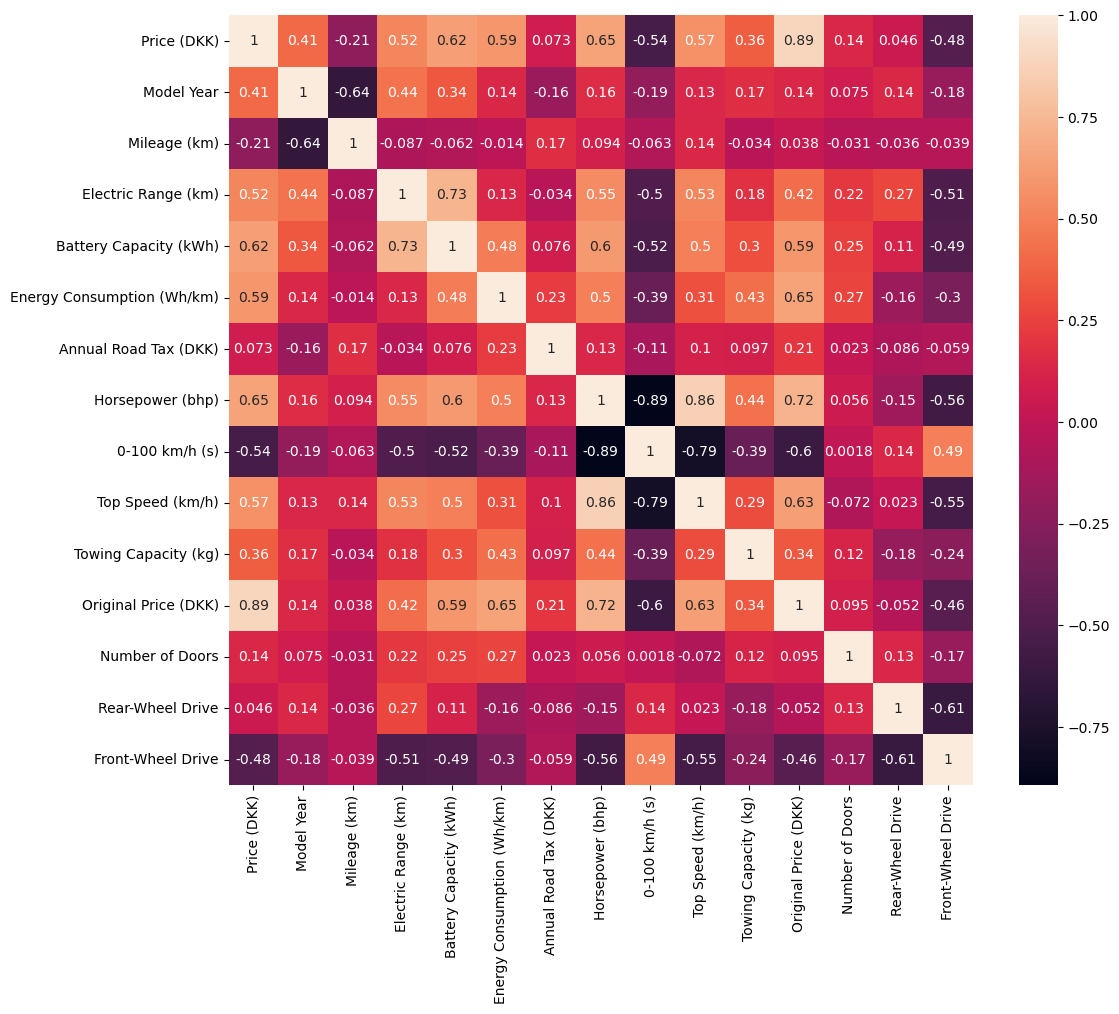

Mean Squared Error (MSE): 2774486707.59
R-squared (R2) Score: 0.86
Root Mean Squared Error (RMSE): 52673.40


In [3]:
# Use this for Correlation and OLS. Add more code blocks if needed.
# 1
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
corr_matrix = data.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True)
plt.show()

# 2
ols = LinearRegression()

ols.fit(X_train,y_train)
intercept,coef = ols.intercept_,ols.coef_
intercept,coef

# 3
y_hat = ols.predict(X_test)
""" residuals = y - y_hat
MSE = np.mean(residuals**2)
print("MSE: ", MSE)
R_squared = 1 - (np.sum(residuals**2)) / (np.sum((y - np.mean(y)) ** 2))
print("R^2: ", R_squared)
RMSE = np.sqrt(MSE)
print("RMSE: ", RMSE) """

from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error

mse = mean_squared_error(y_test,y_hat)
print(f"Mean Squared Error (MSE): {mse:.2f}")
r2=r2_score(y_test ,y_hat)
print(f"R-squared (R2) Score: {r2:.2f}")
rmse = root_mean_squared_error(y_test, y_hat)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# 4
# RMSE beskriver hvor stor gennemsnittet af fejlpræcisionen er. Dvs., på hvert gæt vil modellen gætte 52673.40 forkert 
# R^2 viser hvor nøjagtig modellen er til at beskrive sammenhængen. Jo tættere man kommer på 1, jo mere præcis er modellen.




### Ridge, Lasso and Elastic Net
In order for Ridge and Lasso (and Elastic net) to have an effect, you must use scaled data to build the models, since regularization depends on coefficient magnitude, and if using non-scaled data the penalty will affect them unequally. Feel free to use this code to scale the data:

```python
# Standardize X
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Standardize y
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).flatten()
```
For this task you must do the following:
   - Ridge regression (using multiple alphas)
   - Lasso regression (using multiple alphas)
   - Elastic Net (using multiple alphas)
 - Discussion and conclusion:
   - Discuss the MSE and $R^2$ of all 3 models and conclude which model has the best performance - note the MSE will be scaled!
   - Rebuild the OLS model from Task 4, but this time use the scaled data from this task - interpret the meaning of the model's coefficients
   - Use the coefficients of the best ridge and lasso model to print the 5 most important features and compare to the 5 most important features in the OLS with scaled data model. Do the models agree about which features are the most important?

Note: You may get a convergence warning; try increasing the `max_iter` parameter of the model (the default is 1000 - maybe set it to 100000)

Ridge Regression:
RidgeCV:  43.287612810830616
Score on train set = 0.9023805381861656, Score on test set = 0.863875445749946
MSE on test set = 0.12569635058262857

Lasso Regression:
LassoCV:  0.0024770763559917113
Score on train set = 0.9024003478204624, Score on test set = 0.8655186587190884
MSE on test set = 0.12417902055654205

Elastic Net Regression:
ElasticNetCV:  0.002848035868435802
Score on train set = 0.9024709742180622, Score on test set = 0.8650124355799944
MSE on test set = 0.12464646305077212

Rebuild OLS model:
Mean Squared Error (MSE): 0.12518756276373952
R-squared (R2) Score: 0.8644264443647276

 Ridge
Intercept: 2.1603057542657947e-16

 Lasso
Intercept: 6.728146112829315e-17

 OLS
Intercept: 2.192188500872316e-16


Text(0.5, 1.0, 'OLS')

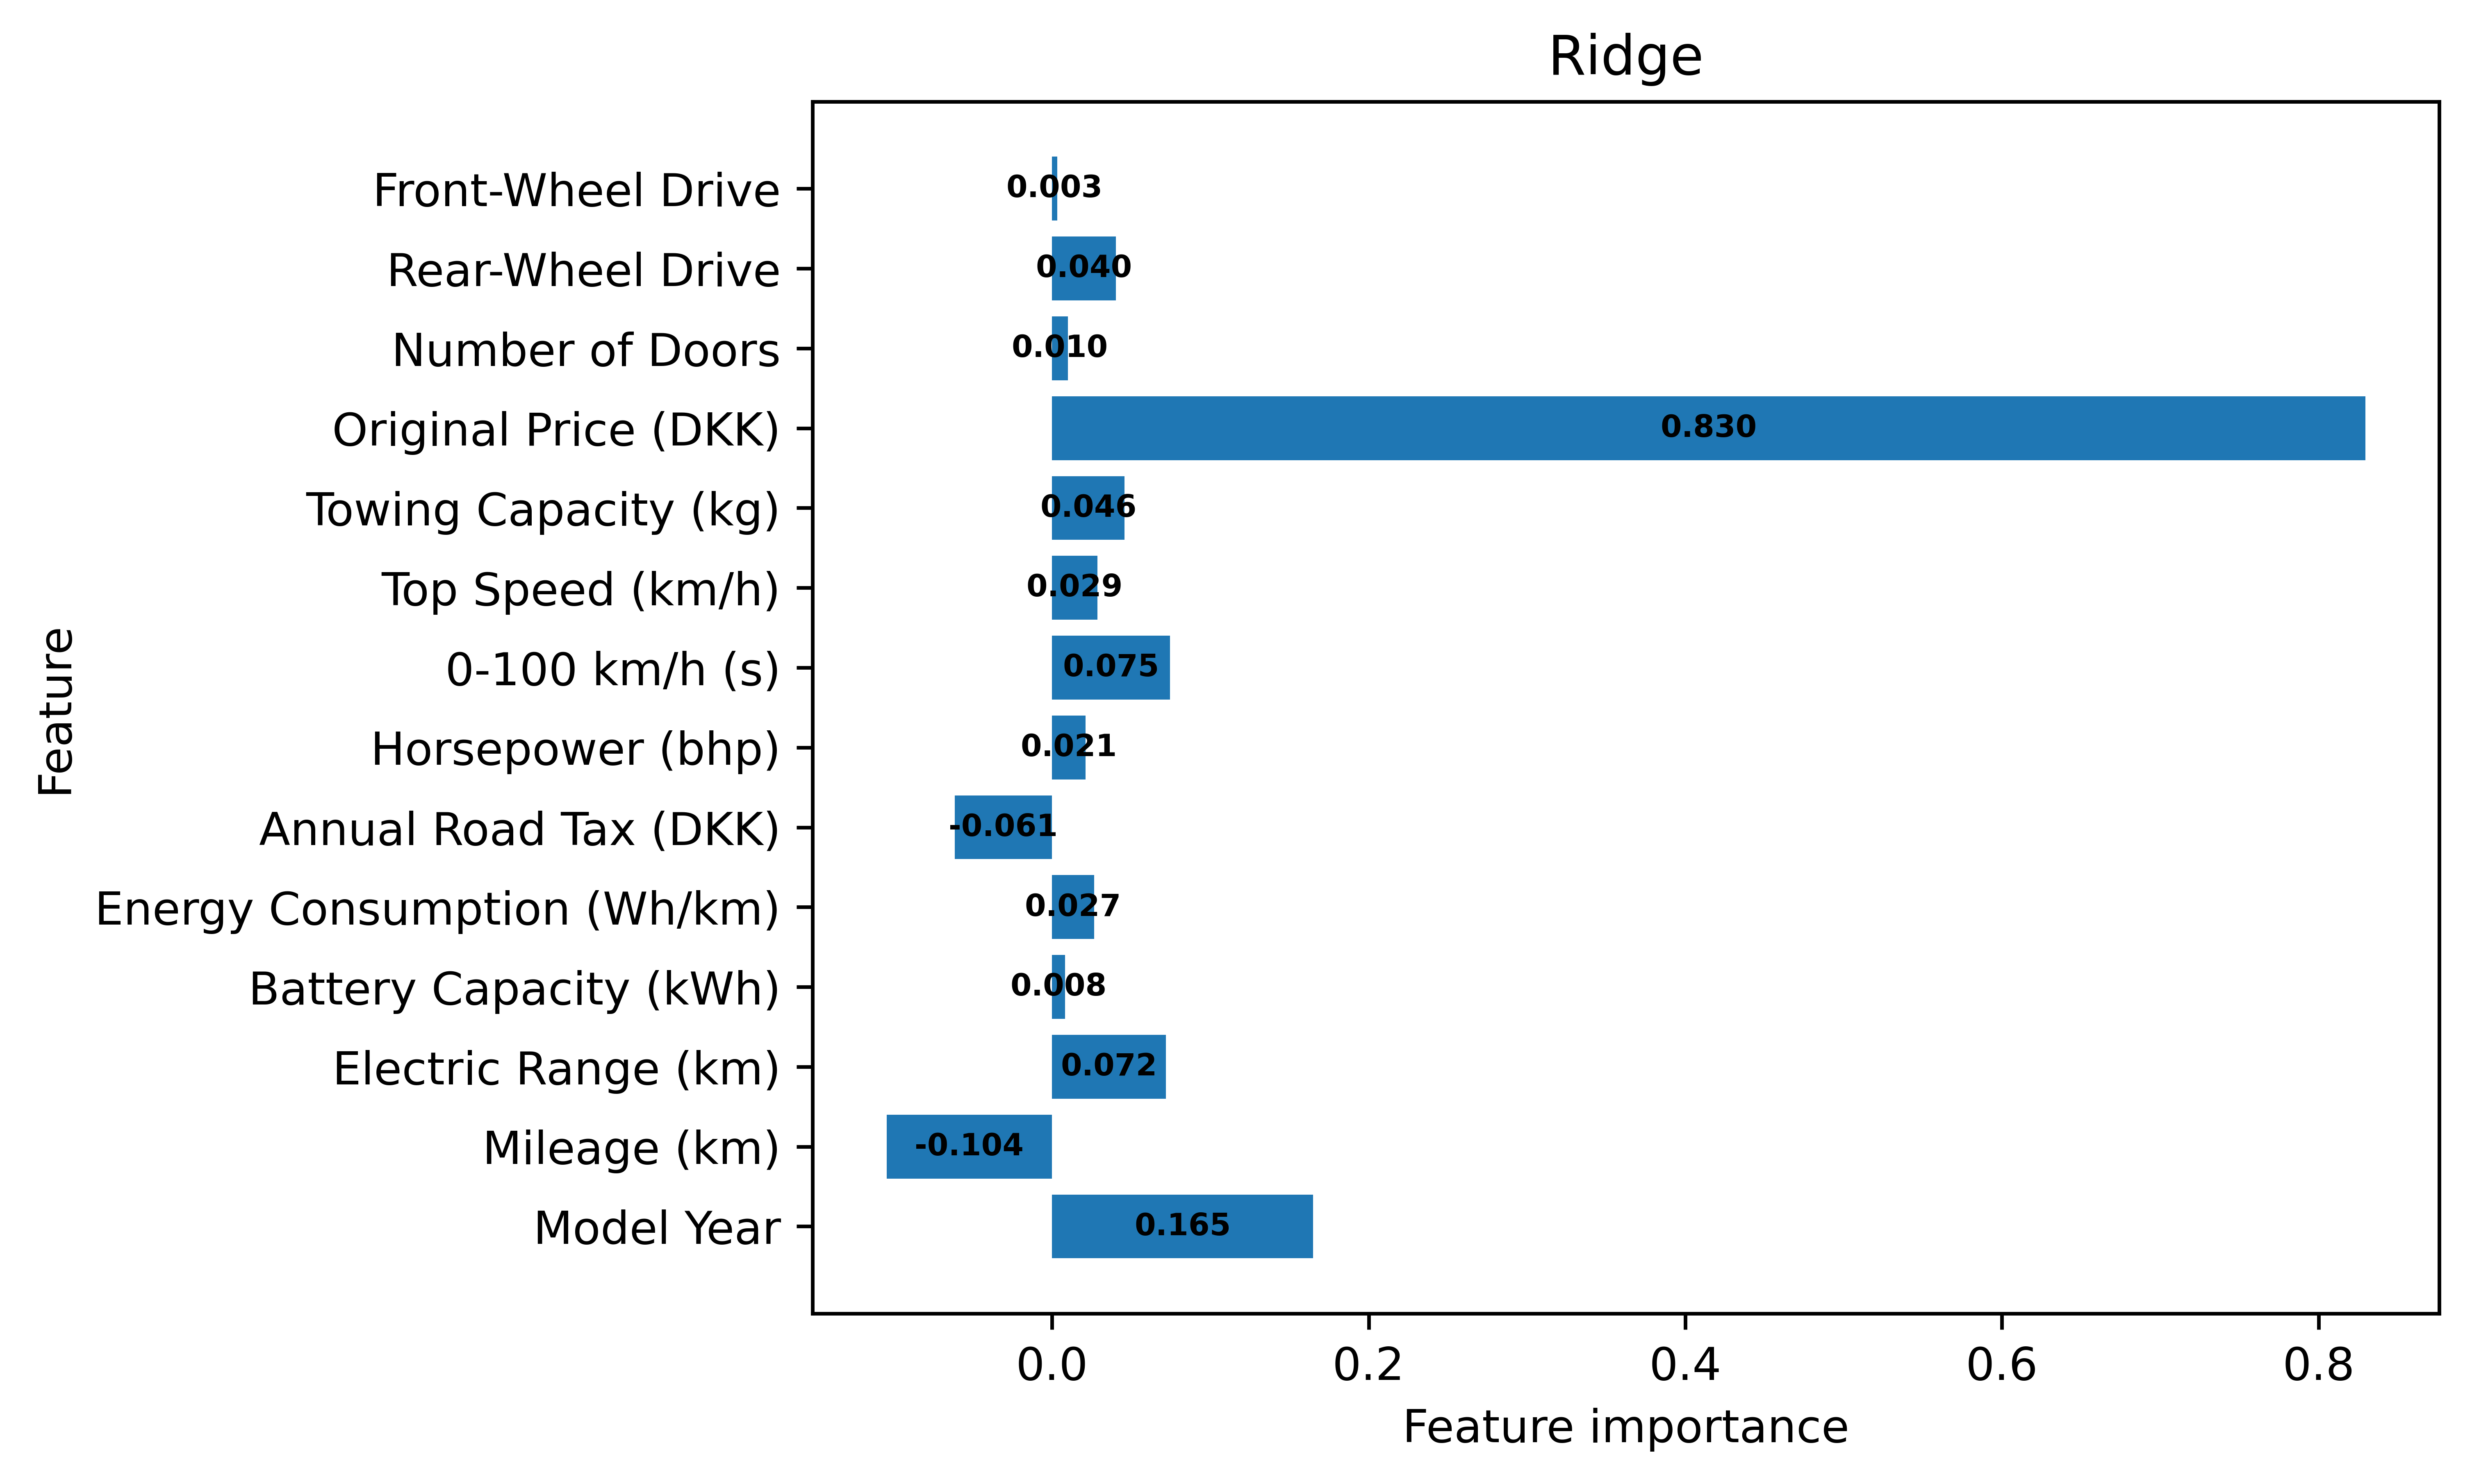

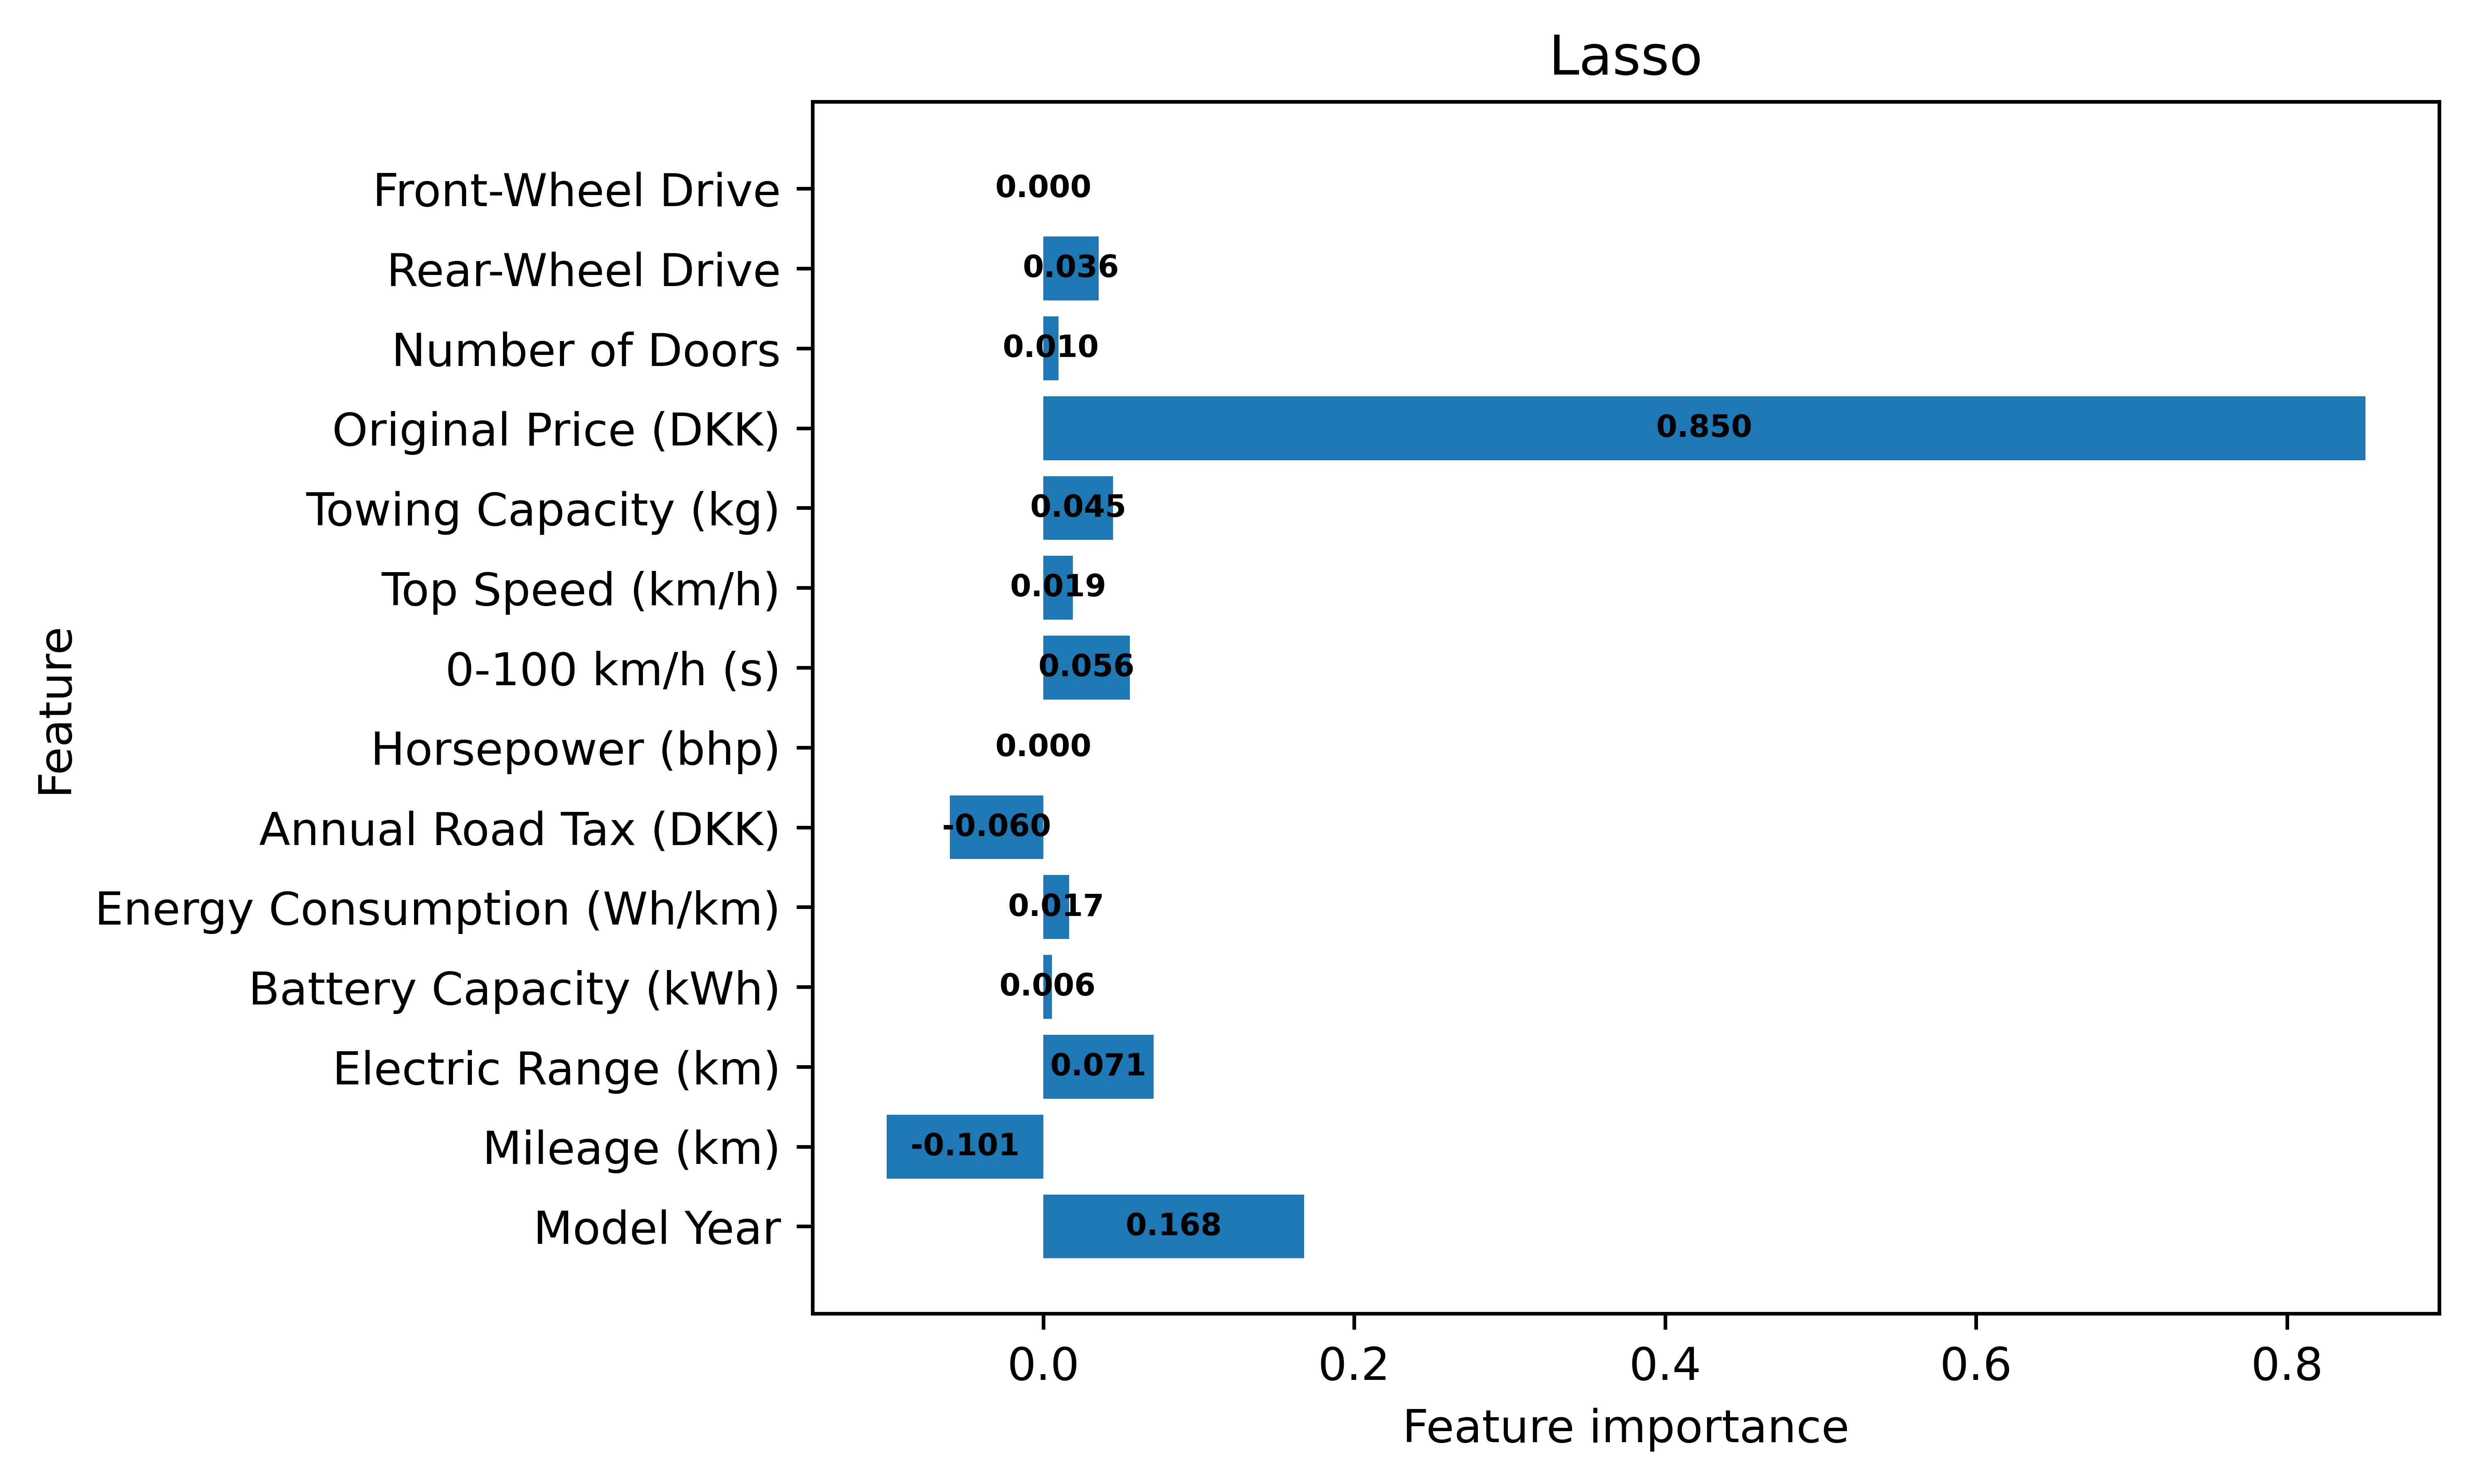

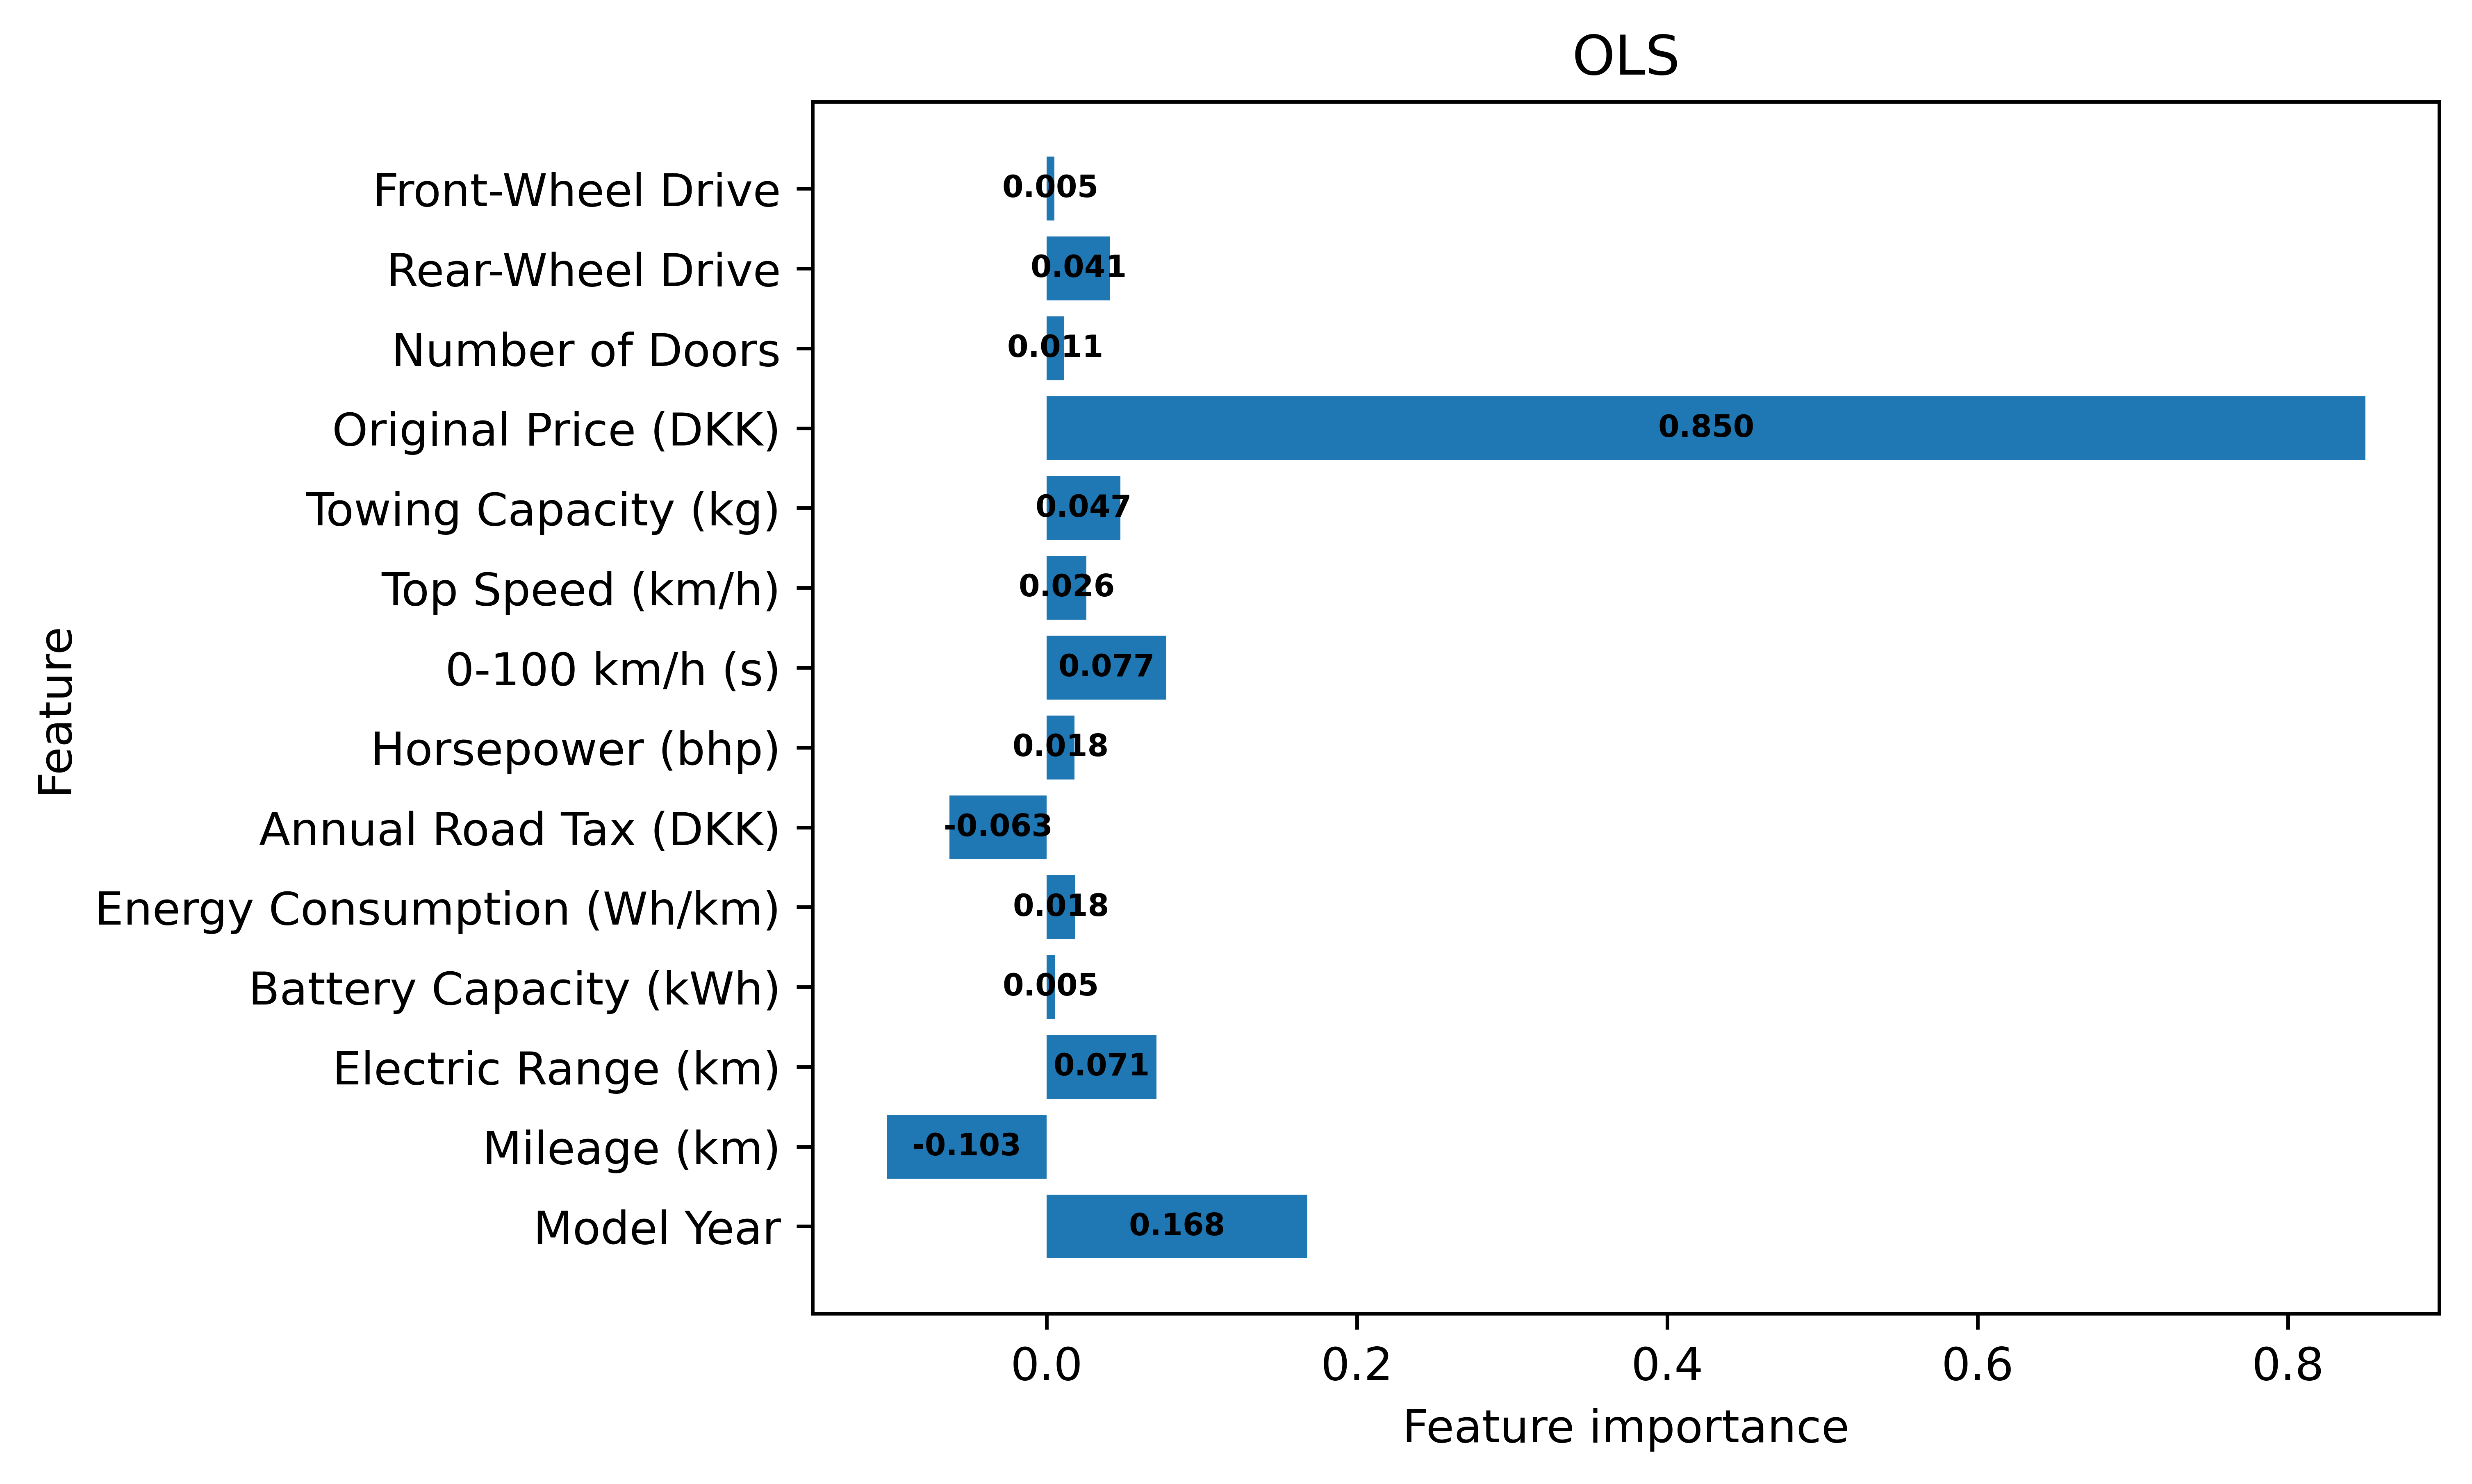

In [4]:
# Use this for Ridge, Lasso and Elastic Net. Add more code blocks if needed.

# Standardize X
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Standardize y
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.to_numpy().reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.to_numpy().reshape(-1, 1)).flatten()

# Ridge regression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge

print("Ridge Regression:")
ridge_cv = RidgeCV(alphas=np.logspace(-4, 2, 100))
ridge_cv.fit(X_train_scaled, y_train_scaled)
print("RidgeCV: ", ridge_cv.alpha_)

ridge = Ridge(alpha=ridge_cv.alpha_)

ridge.fit(X_train_scaled, y_train_scaled)

ridge_test_y_hat = ridge.predict(X_test_scaled)
ridge_mse_test = mean_squared_error(y_test_scaled, ridge_test_y_hat)

print(
    "Score on train set = {0}, Score on test set = {1}".format(
        ridge.score(X_train_scaled, y_train_scaled),
        ridge.score(X_test_scaled, y_test_scaled),
    )
)
print("MSE on test set = {0}".format(ridge_mse_test))


# Lasso regression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

print("\nLasso Regression:")
lasso_cv = LassoCV(alphas=np.logspace(-4, 2, 100))
lasso_cv.fit(X_train_scaled, y_train_scaled)
print("LassoCV: ", lasso_cv.alpha_)

lasso = Lasso(alpha=lasso_cv.alpha_)

lasso.fit(X_train_scaled, y_train_scaled)


lasso_test_y_hat = lasso.predict(X_test_scaled)
lasso_mse_test = mean_squared_error(y_test_scaled, lasso_test_y_hat)

print(
    "Score on train set = {0}, Score on test set = {1}".format(
        lasso.score(X_train_scaled, y_train_scaled),
        lasso.score(X_test_scaled, y_test_scaled),
    )
)
print("MSE on test set = {0}".format(lasso_mse_test))


# Elastic Net
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import ElasticNet

print("\nElastic Net Regression:")
elasticNet_cv = ElasticNetCV(alphas=np.logspace(-4, 2, 100))
elasticNet_cv.fit(X_train_scaled, y_train_scaled)
print("ElasticNetCV: ", elasticNet_cv.alpha_)

elasticNet = ElasticNet(alpha=elasticNet_cv.alpha_)

elasticNet.fit(X_train_scaled, y_train_scaled)

elasticNet_test_y_hat = elasticNet.predict(X_test_scaled)
elasticNet_mse_test = mean_squared_error(y_test_scaled, elasticNet_test_y_hat)

print(
    "Score on train set = {0}, Score on test set = {1}".format(
        elasticNet.score(X_train_scaled, y_train_scaled),
        elasticNet.score(X_test_scaled, y_test_scaled),
    )
)
print("MSE on test set = {0}".format(elasticNet_mse_test))


# Discussion and conclusion:
# Det kan ses på R^2 værdierne, at lasso regression har klaret sig bedst på vores features.

# Rebuild OLS model
print("\nRebuild OLS model:")
ols = LinearRegression()

ols.fit(X_train_scaled, y_train_scaled)
intercept, coef = ols.intercept_, ols.coef_
intercept, coef

y_hat = ols.predict(X_test_scaled)

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test_scaled, y_hat)
print(f"Mean Squared Error (MSE): {mse}")
r2 = r2_score(y_test_scaled, y_hat)
print(f"R-squared (R2) Score: {r2}")

# Most important features (Ridge + Lasso)
print("\n Ridge")
print("Intercept:", ridge.intercept_)

n_features = len(ridge.coef_)
plt.figure(dpi=800)
bars = plt.barh(range(n_features), ridge.coef_, align="center")
plt.bar_label(bars,fontweight="bold",fmt="%.3f", fontsize=6.7, label_type="center", color="black")
plt.yticks(np.arange(n_features), data[features].columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.title("Ridge")


print("\n Lasso")
print("Intercept:", lasso.intercept_)

n_features = len(lasso.coef_)
plt.figure(dpi=800)
bars = plt.barh(range(n_features), lasso.coef_, align="center")
plt.bar_label(bars,fontweight="bold",fmt="%.3f", fontsize=6.7, label_type="center", color="black")
plt.yticks(np.arange(n_features), data[features].columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.title("Lasso")

print("\n OLS")
print("Intercept:", ols.intercept_)

n_features = len(ols.coef_)
plt.figure(dpi=800)
bars = plt.barh(range(n_features), ols.coef_, align="center")
plt.bar_label(bars,fontweight="bold",fmt="%.3f", fontsize=6.7, label_type="center", color="black")
plt.yticks(np.arange(n_features), data[features].columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.title("OLS")



**Ridge:**
* Original price = 0.830
* Model Year = 0.165
* Mileage (km) = -0.104
* <u>0-100 km/h (s) = 0.075</u>
* Electric Range (km) = 0.072

**Lasso:**
* Original price = 0.850
* Model Year = 0.168
* Mileage = -0.101
* Electric Range (km) = 0.071
* <u>Annual Road Tax (DKK) = -0.060</u>

**OLS:**
* Original Price = 0.850
* Model Year = 0.168
* Mileage (km) = -0.103
* <u>0-100 km/h (s) = 0.077</u>
* Electric Range (km) = 0.071

Lasso Regression er ikke enige med de to andre ift. 0-100 km/h som er 0.056 mens ved de to andre er hhv. 0.075 og 0.077.

## Part 3: Classification

### kNN Classifier
In this final task, we go from a regression to a classification problem. Your goal is to classify cars as either **"Cheap"** or **"Expensive"** using the k-Nearest Neighbors (kNN) algorithm.

For this task you must do the following:
- **Prepare the Target Variable**:
   - Calculate the **median** of the original `Price (DKK)` column.
   - Create a new binary target variable, where:
     - `1` (Expensive) if the price is above the median.
     - `0` (Cheap) if the price is at or below the median.
- **Train-Test Split**
- **Feature Scaling**: Use the standardized (scaled) data from Task 5.
- **Model Implementation**:
   - Build a kNN classifier using `sklearn.neighbors.KNeighborsClassifier`.
   - Experiment with at least five different values for $k$ and at least 3 different distance metrics.
- **Evaluation**:
   - Find the best combination of $k$ and distance metric - the one that gives the highest accuracy score.
   - **Discussion**: Explain the trade-off of choosing a very small $k$ versus a very large $k$. Which value performed best for this dataset?

In [5]:
# Use this for Part 3. Add more code blocks if needed.

top_4_features = [
    "Original Price (DKK)",
    "Model Year",
    "Mileage (km)",
    "Electric Range (km)",
]
X = data[top_4_features]

median_price = data["Price (DKK)"].median()

y = [1 if price > median_price else 0 for price in data["Price (DKK)"]]  # target

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

from sklearn.neighbors import KNeighborsClassifier

minkowski_model = KNeighborsClassifier(metric="minkowski",n_neighbors=5)
euclidean_model = KNeighborsClassifier(metric="euclidean",n_neighbors=5)

# Manhattan virker bedst
manhattan_model_1 = KNeighborsClassifier(metric="manhattan",n_neighbors=1)
manhattan_model_4 = KNeighborsClassifier(metric="manhattan",n_neighbors=4)
manhattan_model_5 = KNeighborsClassifier(metric="manhattan",n_neighbors=5)
manhattan_model_6 = KNeighborsClassifier(metric="manhattan",n_neighbors=6)
manhattan_model_10 = KNeighborsClassifier(metric="manhattan",n_neighbors=10)



#minkowski_model.fit(X_train, y_train)
#display("Minkowski: ",minkowski_model.score(X_train, y_train), minkowski_model.score(X_test, y_test))

#euclidean_model.fit(X_train, y_train)
#display("\nEuclidean",euclidean_model.score(X_train, y_train), euclidean_model.score(X_test, y_test))

manhattan_model_1.fit(X_train, y_train)
print("\nManhattan k=1",manhattan_model_1.score(X_train, y_train), manhattan_model_1.score(X_test, y_test))
manhattan_model_4.fit(X_train, y_train)
print("\nManhattan k=4",manhattan_model_4.score(X_train, y_train), manhattan_model_4.score(X_test, y_test))
manhattan_model_5.fit(X_train, y_train)
print("\nManhattan k=5",manhattan_model_5.score(X_train, y_train), manhattan_model_5.score(X_test, y_test))
manhattan_model_6.fit(X_train, y_train)
print("\nManhattan k=6",manhattan_model_6.score(X_train, y_train), manhattan_model_6.score(X_test, y_test))
manhattan_model_10.fit(X_train, y_train)
print("\nManhattan k=10",manhattan_model_10.score(X_train, y_train), manhattan_model_10.score(X_test, y_test))

# En kombination af k=5 og metric=manhattan giver den højeste accuracy score

# Discussion
# Meget lav k-værdi overfitter du
# Meget stort k underfitter du



Manhattan k=1 0.992570281124498 0.9181380417335474

Manhattan k=4 0.9512048192771084 0.9245585874799358

Manhattan k=5 0.9506024096385542 0.9365971107544141

Manhattan k=6 0.9453815261044177 0.9301765650080257

Manhattan k=10 0.9359437751004016 0.9197431781701445
